In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# inserting header in columns
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# data input
df = pd.read_csv('../data/housing.csv', delimiter=r'\s+', names=columns)

In [3]:
# define independent and dependent variables
X = df[['LSTAT']]
y = df[['MEDV']]

In [4]:
# split dataframe in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [5]:
# define function that can represent the curve
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

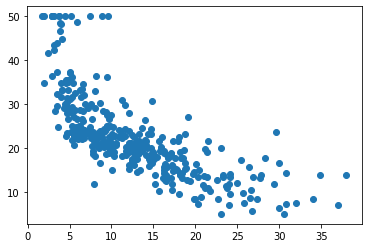

In [6]:
# plot scatter with training data only
plt.scatter(X_train, y_train)
plt.show()

In [8]:
# create non linear regression with curve fit
popt, pcov = curve_fit(exponential, X_train['LSTAT'], y_train['MEDV'])

In [9]:
# popt represents the function's coefficients a, b, c respectively
popt

array([41.28496352,  0.13951111, 12.09475384])

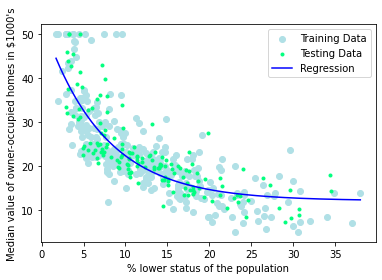

In [10]:
# plot training and testing data with regression
plt.scatter(X_train, y_train, color='#B0E0E6', label='Training Data')

x_line = np.arange(X_train['LSTAT'].min(), X_train['LSTAT'].max(), 0.01)

plt.scatter(X_test['LSTAT'], y_test['MEDV'], color='#00FF7F', marker='.', label='Testing Data')

plt.plot(x_line, exponential(x_line, *popt), color='blue', label='Regression')

plt.legend(loc="upper right")
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

plt.show()

In [11]:
# evaluetes model
print(mean_squared_error(y_test, exponential(X_test, *popt)))
print(r2_score(y_test, exponential(X_test, *popt)))

22.797246540796472
0.7034721152736079


Compared to the previous model, this model is more assertive and more representative in relation to the curve. This is demonstrated by the metrics above, where r2 is larger and the mean squared error is smaller than the previous results.